In [1]:
from flask import Flask
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [5]:
app = Flask(__name__)
df = pd.read_csv("/Users/tichi/Downloads/LG_Customer_Data.csv")
df.head()
df.info()
df.describe()
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [9]:
# Split the data into training and test datasets
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

In [11]:
# Step 3: Model Development
# For this example, we'll use K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

C:\Users\tichi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tichi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [13]:
# Assign clusters to the original data based on the full dataset for evaluation purposes
df['Cluster'] = kmeans.predict(scaled_features)


In [15]:
# Step 4: Evaluate Model Performance
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_train, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 0.41940649770537275
Calinski-Harabasz Index: 100.4899669054059


In [17]:
# Step 4.1: K-Validation
k_values = range(2, 11)  # Testing k from 2 to 10
silhouette_scores = []
calinski_harabasz_scores = []


In [19]:
for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_train)
    labels = kmeans_test.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train, labels))


C:\Users\tichi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tichi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tichi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tichi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

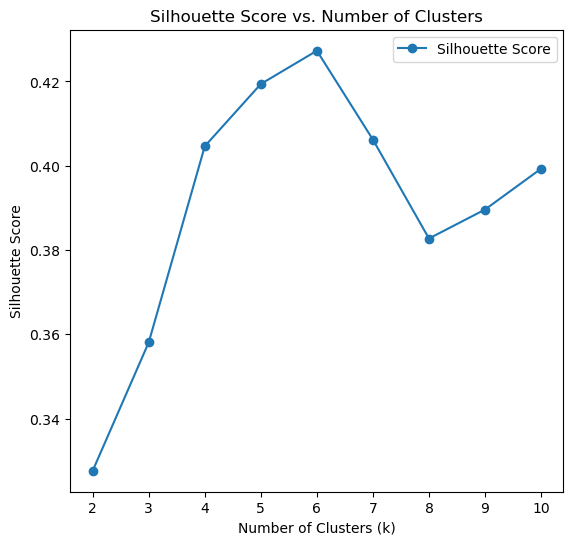

In [21]:
# Plot the metrics for different k values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()

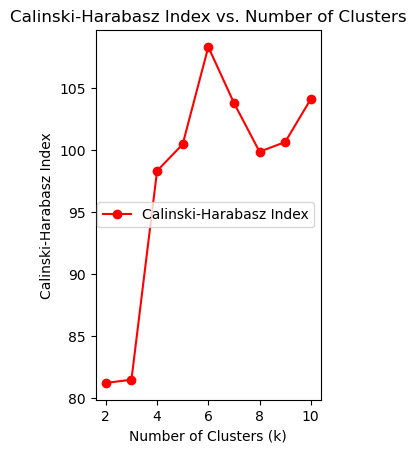

In [23]:
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='r', label='Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.legend()

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

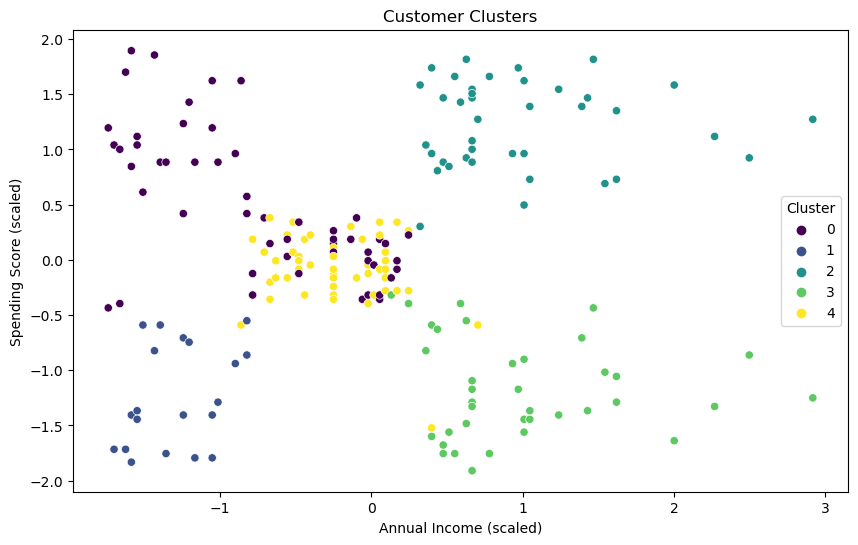

In [27]:
# Step 5: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 1], y=scaled_features[:, 2],
    hue=df['Cluster'], palette='viridis', legend='full'
)
plt.title('Customer Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [29]:
# Step 6: Save the model for deployment
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler have been saved for deployment.")

Model and scaler have been saved for deployment.


In [31]:
pip install flask joblib scikit-learn


In [33]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow Version: 2.16.1


In [35]:
tf.keras.models.load_model

<function keras.src.saving.saving_api.load_model(filepath, custom_objects=None, compile=True, safe_mode=True)>

In [37]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install joblib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load model and scaler
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/')
def home():
    return "KMeans Model API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Parse input JSON
        data = request.json
        features = np.array(data['features']).reshape(1, -1)
        
        # Scale features
        scaled_features = scaler.transform(features)
        
        # Make prediction
        cluster = kmeans.predict(scaled_features)[0]
        
        return jsonify({"cluster": int(cluster)})
    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.10.3.181:5000
Press CTRL+C to quit
10.10.3.181 - - [20/Jan/2025 08:33:58] "GET / HTTP/1.1" 200 -
10.10.3.181 - - [20/Jan/2025 08:33:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Jan/2025 08:34:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jan/2025 08:34:04] "GET /favicon.ico HTTP/1.1" 404 -


In [45]:
{
  "features": [5.1, 3.5, 1.4, 0.2]
}


{'features': [5.1, 3.5, 1.4, 0.2]}

In [69]:
!pip freeze > requirements.txt

In [71]:
with open("requirements.txt", "w") as f:
    f.write("\n".join([
        "Flask==2.2.5",
        "joblib==1.3.0",
        "scikit-learn==1.2.2",
        "numpy==1.24.4"
    ]))


In [63]:
# Create and write the start.sh file
with open("start.sh", "w") as f:
    f.write("#!/bin/bash\n")
    f.write("python app.py\n")

print("start.sh file has been created.")

start.sh file has been created.


In [65]:
!chmod +x start.sh

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [67]:
from IPython.display import FileLink
FileLink("start.sh")

C:\Users\tichi\start.sh

In [73]:
from IPython.display import FileLink
FileLink("requirements.txt")

C:\Users\tichi\requirements.txt